# Notebook 3 - Bias and Variability of Estimators

In [1]:
#@title Imports
!pip install -q symbulate
from symbulate import *

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#@title Define Plotting Functions

def plot_discrete_function(f, xlim=(0, 10), xlabel=r"$\theta$", ylabel="Likelihood"):
    xs = np.arange(np.ceil(xlim[0]), np.floor(xlim[1]) + 1, dtype=int)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys, "ko-")
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlim(*xlim)

def plot_continuous_function(f, xlim=(0, 1), xlabel=r"$\theta$", ylabel="Likelihood"):
    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys, "-")
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlim(*xlim)

## Exer 3.1

In [3]:
n = 3
mu = 2.3

P = Poisson(mu) ** n
P.sim(10)

0,"(3, 4, 4)"
1,"(5, 3, 1)"
2,"(3, 1, 2)"
3,"(6, 2, 3)"
4,"(2, 5, 3)"
5,"(2, 2, 0)"
6,"(2, 3, 1)"
7,"(0, 5, 5)"
8,"(0, 3, 3)"
...,...
9,"(5, 1, 2)"


In [4]:
Xbar = RV(P, mean)
Muhat_e = 2.3

### Note: `var` in Symbulate returns $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$.  That is, $1/n$, so `var` in Symbulate corresponds to $\hat{\sigma}^2$ rather than $S^2$.

In [5]:
Sigmahat2 = RV(P, var)
S2 = Sigmahat2 * n / (n - 1)


(RV(P) & Xbar & Sigmahat2 & S2 & Muhat_e).sim(10)

0,"((1, 2, 1), 1.3333333333333333, 0.2222222222222222, 0.3333333333333333, 2.3)"
1,"((1, 0, 0), 0.3333333333333333, 0.22222222222222224, 0.33333333333333337, 2.3)"
2,"((3, 2, 4), 3.0, 0.6666666666666666, 1.0, 2.3)"
3,"((0, 3, 4), 2.3333333333333335, 2.8888888888888893, 4.333333333333334, 2.3)"
4,"((3, 3, 1), 2.3333333333333335, 0.8888888888888888, 1.3333333333333333, 2.3)"
5,"((1, 4, 2), 2.3333333333333335, 1.5555555555555556, 2.3333333333333335, 2.3)"
6,"((0, 2, 3), 1.6666666666666667, 1.5555555555555556, 2.3333333333333335, 2.3)"
7,"((0, 0, 1), 0.3333333333333333, 0.22222222222222224, 0.33333333333333337, 2.3)"
8,"((3, 0, 2), 1.6666666666666667, 1.5555555555555554, 2.333333333333333, 2.3)"
...,...
9,"((3, 3, 0), 2.0, 2.0, 3.0, 2.3)"


$\hat{\mu}_d$ is not defined if there are no 0s in the sample

In [6]:
N0 = RV(P, count_eq(0))
Muhat_d = -log(N0 / n)
( (RV(P) & Muhat_d) | (N0 > 0) ).sim(10)

0,"((0, 3, 2), 1.0986122886681098)"
1,"((3, 5, 0), 1.0986122886681098)"
2,"((6, 4, 0), 1.0986122886681098)"
3,"((0, 7, 0), 0.40546510810816444)"
4,"((0, 2, 5), 1.0986122886681098)"
5,"((0, 2, 5), 1.0986122886681098)"
6,"((4, 2, 0), 1.0986122886681098)"
7,"((0, 2, 3), 1.0986122886681098)"
8,"((0, 3, 0), 0.40546510810816444)"
...,...
9,"((2, 0, 2), 1.0986122886681098)"


## Exer 3.2

In [7]:
xbar = Xbar.sim(10000)
xbar

0,1.6666666666666667
1,0.6666666666666666
2,2.3333333333333335
3,3.3333333333333335
4,2.6666666666666665
5,1.3333333333333333
6,3.6666666666666665
7,0.6666666666666666
8,3.6666666666666665
...,...
9999,3.3333333333333335


In [8]:
xbar.tabulate()

0.0,9
0.3333333333333333,71
0.6666666666666666,242
1.0,552
1.3333333333333333,939
1.6666666666666667,1372
2.0,1517
2.3333333333333335,1478
2.6666666666666665,1240
3.0,975
3.3333333333333335,667


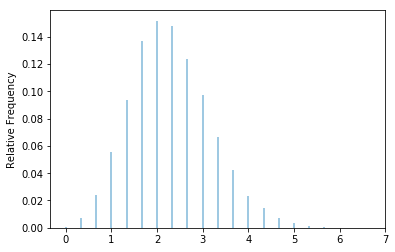

In [9]:
xbar.plot()

In [10]:
xbar.count_eq(0) / xbar.count(), Poisson(n * mu).pmf(n * 0)

(0.0009, 0.0010077854290485113)

In [11]:
xbar.count_eq(1 / 3) / xbar.count(), Poisson(n * mu).pmf(n * 1 / 3)

(0.0071, 0.006953719460434728)

In [12]:
xbar.count_eq(2 / 3) / xbar.count(), Poisson(n * mu).pmf(n * 2 / 3)

(0.0242, 0.0239903321384998)

In [13]:
xbar.mean()

2.2996999999999996

In [14]:
xbar.var()

0.7841910211111112

## Widget might not work in Colab

In [15]:
from ipywidgets import interactive
import ipywidgets as widgets

def f(mu, n):
    x = RV(Poisson(mu) ** n, mean).sim(10000)
    x.plot()
    plt.xlabel("Sample mean")
    plt.ylabel("Relative frequency of samples")
    plt.title(r"Poisson($\mu$): Sampling distribution of $\bar{X}$" +
              "\n Expected value when $n=%s$" % n +
              " and $\mu=%s$" % mu
              + r" is $%s$" % round(x.mean(),0))
    
    # draw vertical strip at expected value
    plt.axvline(x.mean(), 0, 1, alpha=.3, linewidth=4, color="orange")
    plt.show()

interactive_plot = interactive(f, mu=widgets.FloatSlider(value=1, max=10, min=0.01, step=0.01),
                               n=widgets.IntSlider(value=3, max=10, min=1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='mu', max=10.0, min=0.01, step=0.01), IntSlider(value…

## Exer 3.3

In [16]:
s2 = S2.sim(10000)
s2.tabulate()

0.0,417
0.3333333333333333,932
0.33333333333333337,1201
1.0,1611
1.3333333333333333,719
1.3333333333333335,636
2.333333333333333,950
2.3333333333333335,777
3.0,562
4.0,375
4.333333333333333,205


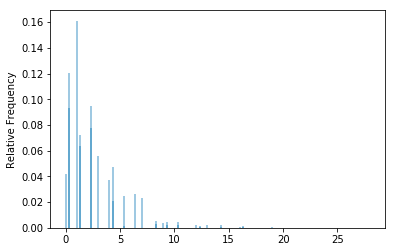

In [17]:
s2.plot()

In [18]:
s2.mean()

2.3198666666666665

## Widget might not work in Colab

In [19]:
from ipywidgets import interactive
import ipywidgets as widgets

def f(mu, n):
    x = (RV(Poisson(mu) ** n, var) * n / (n - 1)).sim(10000)
    x.plot()
    plt.xlabel("Sample variance")
    plt.ylabel("Relative frequency of samples")
    plt.title(r"Poisson($\mu$): Sampling distribution of $S^2$" +
              "\n Expected value when $n=%s$" % n +
              " and $\mu=%s$" % mu
              + r" is $%s$" % round(x.mean(),0))
    
    # draw vertical strip at expected value
    plt.axvline(x.mean(), 0, 1, alpha=.3, linewidth=4, color="orange")
    plt.show()

interactive_plot = interactive(f, mu=widgets.FloatSlider(value=1, max=10, min=0.01, step=0.01),
                               n=widgets.IntSlider(value=3, max=10, min=1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='mu', max=10.0, min=0.01, step=0.01), IntSlider(value…

In [20]:
sigmahat2 = Sigmahat2.sim(10000)
sigmahat2.tabulate()

0.0,461
0.2222222222222222,920
0.22222222222222224,1306
0.6666666666666666,1570
0.8888888888888888,696
0.888888888888889,629
1.5555555555555554,922
1.5555555555555556,719
2.0,635
2.6666666666666665,392
2.888888888888889,175


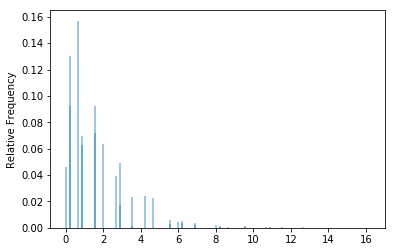

In [21]:
sigmahat2.plot()

In [22]:
sigmahat2.mean()

1.5019777777777776

In [23]:
sigmahat2.var()

2.5399096686419753

## Widget might not work in Colab

In [24]:
from ipywidgets import interactive
import ipywidgets as widgets

def f(mu, n):
    x = (RV(Poisson(mu) ** n, var)).sim(10000)
    x.plot()
    plt.xlabel("Biased sample variance")
    plt.ylabel("Relative frequency of samples")
    plt.title(r"Poisson($\mu$): Sampling distribution of $\hat{\sigma}^2$" +
              "\n Expected value when $n=%s$" % n +
              " and $\mu=%s$" % mu
              + r" is $%s$" % round(x.mean(),0))
    
    # draw vertical strip at expected value
    plt.axvline(x.mean(), 0, 1, alpha=.3, linewidth=4, color="orange")
    plt.show()

interactive_plot = interactive(f, mu=widgets.FloatSlider(value=1, max=10, min=0.01, step=0.01),
                               n=widgets.IntSlider(value=3, max=10, min=1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='mu', max=10.0, min=0.01, step=0.01), IntSlider(value…

## Exer 3.4

(0.10066666666666667, 0.10025884372280375)

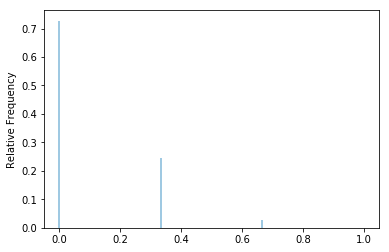

In [25]:
Thetahat = N0 / n
thetahat = Thetahat.sim(10000)
thetahat.plot()
thetahat.mean(), Poisson(mu).pmf(0)

1.0270872126278752

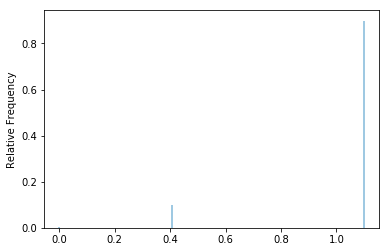

In [26]:
muhat_d = (Muhat_d | (N0 > 0) ).sim(10000)
muhat_d.plot()
muhat_d.mean()

### Better example: $S$ is biased estimator of population SD $\sigma$ even though $S^2$ is an unbiased estimator of population variance $\sigma^2$.

(1.3155925893264706, 1.51657508881031)

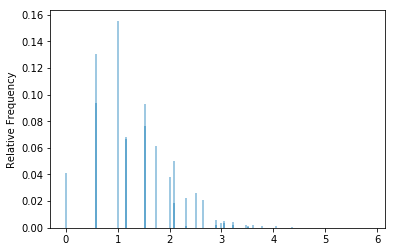

In [27]:
S = sqrt(S2)
s = S.sim(10000)
s.plot()
s.mean(), sqrt(mu)

## Exer 3.5

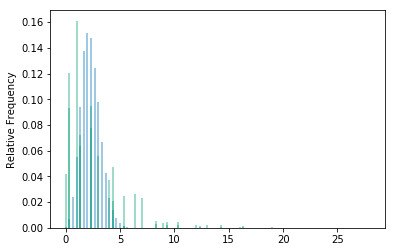

In [28]:
xbar.plot()
s2.plot()

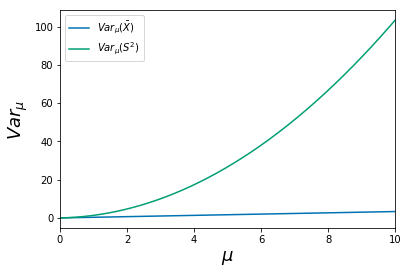

In [29]:
n = 3

def Var_Xbar(mu):
    return mu / n

def Var_S2(mu):
    return mu / n + 2 * mu ** 2 / (n - 1)

plot_continuous_function(Var_Xbar, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plot_continuous_function(Var_S2, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel=r"$Var_\mu$")

plt.legend([r"$Var_\mu(\bar{X})$", r"$Var_\mu(S^2)$"]);

## Exer 3.6

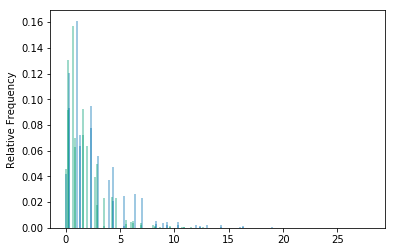

In [30]:
s2.plot()
sigmahat2.plot()

In [31]:
s2.mean(), sigmahat2.mean()

(2.3198666666666665, 1.5019777777777776)

In [32]:
s2.var(), sigmahat2.var()

(6.371574204444445, 2.5399096686419753)

In [33]:
s2.var(), sigmahat2.var() + (sigmahat2.mean() - mu) ** 2

(6.371574204444445, 3.176749135802469)

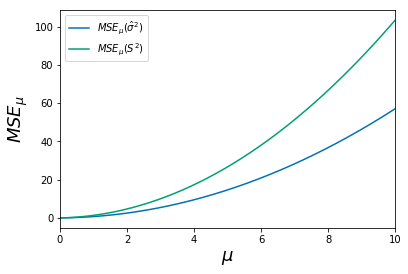

In [34]:
n = 3

def MSE_S2(mu):
    return mu / n + 2 * mu ** 2 / (n - 1) + 0 ** 2

def MSE_Sigmahat2(mu):
    return ((n - 1) / n) ** 2 * MSE_S2(mu) + (-mu / n) ** 2

plot_continuous_function(MSE_Sigmahat2, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plot_continuous_function(MSE_S2, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel=r"$MSE_\mu$")

plt.legend([r"$MSE_\mu(\hat{\sigma}^2)$", r"$MSE_\mu(S^2)$"]);

## Exer 3.7

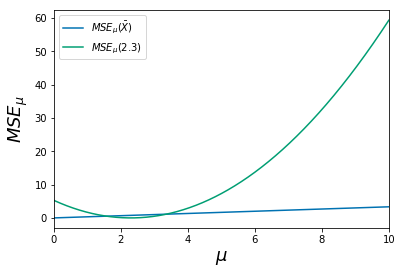

In [35]:
n = 3

def MSE_Xbar(mu):
    return mu / n + 0 ** 2 # variability but no bias

def MSE_Muhat_e(mu):
    return 0 + (2.3 - mu) ** 2 # bias but no variability

plot_continuous_function(MSE_Xbar, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel="")

plot_continuous_function(MSE_Muhat_e, xlim=(0.01, 10),
                         xlabel="$\mu$", ylabel=r"$MSE_\mu$")

plt.legend([r"$MSE_\mu(\bar{X})$", r"$MSE_\mu(2.3)$"]);